# HCL Hackathon 2020 Machine Learning Question 

In [208]:

import pandas as pd #for data manipulation
import numpy as np #for complex matrix operations
from sklearn.naive_bayes import GaussianNB #classifier
from sklearn.model_selection import train_test_split #for splitting test data and train data 
from sklearn import metrics #to calculate the Accuracy
import matplotlib.pyplot as plt #for data visualization

## Loading the dataset with the given URL 

In [33]:
url = 'https://mettl-arq.s3-ap-southeast-1.amazonaws.com/questions/iit-kanpur/cyber-security-hackathon/round1/problem2/f1fswvsvi0/training.json'

df = pd.read_json(url, lines =True)
train_length =df.size


## Given Dataset

In [205]:
df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,"{'SAI TARUN PAWAR': {'grade': 'Fair', 'score10...","{'AKSHAY Dasgupta': {'grade': 'Very good', 'sc...","{'Aneet Randhawa': {'grade': 'Exceptional', 's...","{'FARDIN NAWAB ALI BHATI': {'grade': 'Good', '...","{'ASHISH KUMAR': {'grade': 'Fair', 'score10': ...","{'RUCHI AWASTHI': {'grade': 'Good', 'score10':...","{'Kumar Goodwill': {'grade': 'Very good', 'sco...","{'Sunil Sharma': {'grade': 'Exceptional', 'sco...","{'Vishal Sethi': {'grade': 'Poor', 'score10': ...","{'Ankit Gour': {'grade': 'Good', 'score10': 71...",...,{'ARUN KUMAR JHAJHARIA': {'grade': 'Very good'...,"{'MEETUL RATHORE': {'grade': 'Good', 'score10'...","{'RITESH SINGH': {'grade': 'Good', 'score10': ...","{'SNIGDHA PANDEY': {'grade': 'Exceptional', 's...","{'Rohit sharma': {'grade': 'Good', 'score10': ...","{'KAMESH SHRIVASTAVA': {'grade': 'Good', 'scor...","{'Sonu Dave': {'grade': 'Poor', 'score10': 92,...","{'Ankit Sodhi': {'grade': 'Good', 'score10': 9...","{'Ram Gopal Jaiswal': {'grade': 'Fair', 'score...","{'RAVI KUMAR MISHRA': {'grade': 'Exceptional',..."


## Cleaning and converting the JSON objects


In [150]:
y= []


for key in df.keys():
    one_student=df.get(key)
    
    for name in one_student.keys():
        
        student = one_student.get(name)
        
        for real in student.keys():
            
            
            mark = student.get(real)
            x1=[]
            for grade in mark.keys():
                
                x1.append(mark.get(grade))   
            y.append(x1)
                
                
    
    

## Creating a DataFrame with the cleaned data

In [153]:
cleaned_data = pd.DataFrame(y,columns = ['grade','score1','score2','score3','score4','score5','score6','score7','score8','score9','score10'])

In [154]:
cleaned_data

,grade,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,Fair,94,67,99,67,72,94,84,81,93,63
1,Very good,77,95,85,81,83,92,98,97,83,82
2,Exceptional,91,95,93,95,93,91,93,91,83,85
3,Good,75,72,91,84,93,93,98,77,74,97
4,Fair,80,77,87,75,89,82,94,84,99,75
...,...,...,...,...,...,...,...,...,...,...,...
4995,Good,93,89,76,91,79,95,91,94,76,87
4996,Poor,92,98,65,66,46,87,86,64,83,54
4997,Good,91,99,77,86,97,96,91,96,73,91
4998,Fair,70,96,97,85,74,87,87,64,81,84


## Visualizing the cleaned data

<StemContainer object of 3 artists>

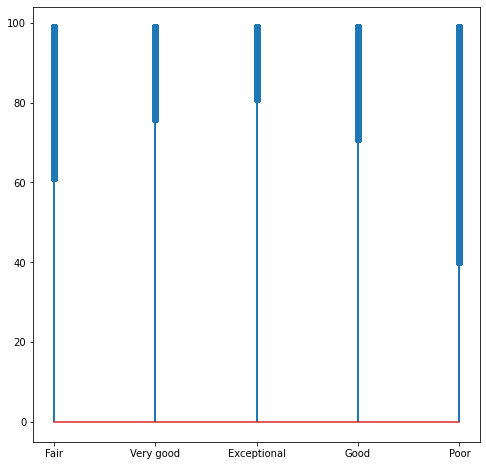

In [237]:
fig,ax = plt.subplots(figsize = (8,8))
ax.stem(cleaned_data.grade,cleaned_data.score1)

## Feature Selection

### All independant features

In [187]:
X = cleaned_data.drop(['grade'],axis=1)
X

,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,94,67,99,67,72,94,84,81,93,63
1,77,95,85,81,83,92,98,97,83,82
2,91,95,93,95,93,91,93,91,83,85
3,75,72,91,84,93,93,98,77,74,97
4,80,77,87,75,89,82,94,84,99,75
...,...,...,...,...,...,...,...,...,...,...
4995,93,89,76,91,79,95,91,94,76,87
4996,92,98,65,66,46,87,86,64,83,54
4997,91,99,77,86,97,96,91,96,73,91
4998,70,96,97,85,74,87,87,64,81,84


### Target Data

In [189]:
Y = cleaned_data.grade
Y

0              Fair
1         Very good
2       Exceptional
3              Good
4              Fair
           ...     
4995           Good
4996           Poor
4997           Good
4998           Fair
4999    Exceptional
Name: grade, Length: 5000, dtype: object

## Train and test data split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
  

## Naive Bayes Classifier 

In [196]:

model = GaussianNB()


## Training

In [197]:
model.fit(X,Y)

GaussianNB()

## Testing

In [198]:
predicted_grade = model.predict(X_test)

In [222]:

print("Accuracy: ", metrics.accuracy_score(y_test, predicted_grade)*100)


Accuracy:  89.4
